<a href="https://colab.research.google.com/github/Amaljayaranga/Autoencoders/blob/master/ConVAutoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

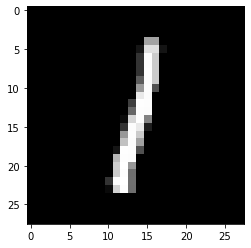

torch.Size([100, 1, 28, 28])


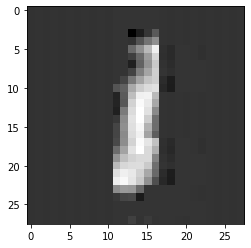

In [11]:
import torch
from torch import nn
from torch.autograd import Variable
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt
from torchsummary import summary

dataset = MNIST('./data',transform=transforms.ToTensor(), download=True)
dataloader = DataLoader(dataset,batch_size=100,shuffle=True)


class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder,self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=1)
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels=16, out_channels=8, kernel_size=3, stride=2),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(in_channels=8, out_channels=4, kernel_size=3, stride=3),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(in_channels=4, out_channels=1, kernel_size=2, stride=2,padding=1),
            nn.Tanh()
        )

    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


model = autoencoder()
#summary(model,(1,28,28))
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train = False

if train:
    for epoch in range(100):
        for data in dataloader:
            img, _ = data
            img = img.view(img.size(0), 1, 28, 28)
            #print(img.size())
            img = Variable(img)
            #print(img.size())


            output = model(img)
            #print(output.size())
            loss = criterion(output,img)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print('Epoch :', epoch+1, 'Loss:',loss.item())

    torch.save(model, './conv_autoencoder.pth')

if not train:
    model = torch.load('./conv_autoencoder.pth')
    model.eval()

    img, _ = next(iter(dataloader))
    plt.imshow(img.numpy()[0].reshape(28,28), cmap='gray')
    plt.show()

    img = img.view(img.size(0), 1, 28, 28)
    img = Variable(img)
    #print(img.size())
    output = model(img)
    print(output.size())
    plt.imshow(output.detach().numpy()[0].reshape(28,28), cmap='gray')
    plt.show()